# Heart Disease Prediction Using Machine Learning

**This notebook demonstrates how to predict heart disease using Logistic Regression, Random Forest, and XGBoost. It also integrates an ensemble (hybrid) model for better accuracy.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier


## Load Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Understanding Each Input Feature in Detail

The heart disease prediction dataset consists of various medical parameters. Below is a detailed explanation of each feature and its significance in predicting heart disease.

### 1. Age (age)
Represents the age of the person in years.
- Heart disease risk increases with age.

### 2. Sex (sex)
- **0** → Female
- **1** → Male
- Men are at higher risk of heart disease compared to women.

### 3. Chest Pain Type (cp)
Indicates the type of chest pain the person experiences:
- **0** → Typical Angina (Chest pain related to the heart)
- **1** → Atypical Angina (Chest pain not related to heart disease)
- **2** → Non-Anginal Pain (Chest pain not due to heart problems)
- **3** → Asymptomatic (No chest pain, but still might have heart disease)
- Higher values (especially 3) increase the probability of heart disease.

### 4. Resting Blood Pressure (trestbps)
- Measured in mmHg (millimeters of mercury).
- Normal range: **90 - 120 mmHg**.
- High blood pressure (>130 mmHg) is a risk factor for heart disease.

### 5. Serum Cholesterol (chol)
- Measured in mg/dL (milligrams per deciliter).
- Normal level: Below **200 mg/dL**.
- High cholesterol (>240 mg/dL) increases the risk of heart disease.

### 6. Fasting Blood Sugar (fbs)
- **0** → Blood sugar < 120 mg/dL (Normal)
- **1** → Blood sugar > 120 mg/dL (Diabetes)
- Diabetes is a significant risk factor for heart disease.

### 7. Resting Electrocardiographic Results (restecg)
- **0** → Normal ECG
- **1** → Abnormalities in the ST-T wave (could indicate heart disease)
- **2** → Left ventricular hypertrophy (thickened heart wall, which is risky)

### 8. Maximum Heart Rate Achieved (thalach)
- The highest heart rate a person reaches during exercise.
- Normal range: **60 - 200 bpm** (beats per minute).
- Lower values may indicate a weaker heart.

### 9. Exercise-Induced Angina (exang)
- **0** → No (Person does not experience chest pain during exercise)
- **1** → Yes (Person experiences chest pain during exercise)
- People with angina during exercise are at higher risk of heart disease.

### 10. ST Depression Induced by Exercise (oldpeak)
- Higher values (>2.0) indicate heart stress and higher risk of heart disease.

### 11. Slope of the Peak Exercise ST Segment (slope)
- **0** → Upsloping (Normal, low risk)
- **1** → Flat (Intermediate risk)
- **2** → Downsloping (High risk of heart disease)

### 12. Number of Major Vessels Colored by Fluoroscopy (ca)
- Higher values indicate more blockage and higher risk of heart disease.

### 13. Thalassemia (thal)
- **1** → Fixed defect (permanent damage)
- **2** → Normal blood flow
- **3** → Reversible defect (can be treated)

### 14. Target (target)
- **0** → No heart disease
- **1** → Presence of heart disease


## Data Preprocessing (Handling Missing Values, Feature Scaling)

In [3]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Exploratory Data Analysis (EDA)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8080\2486158579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


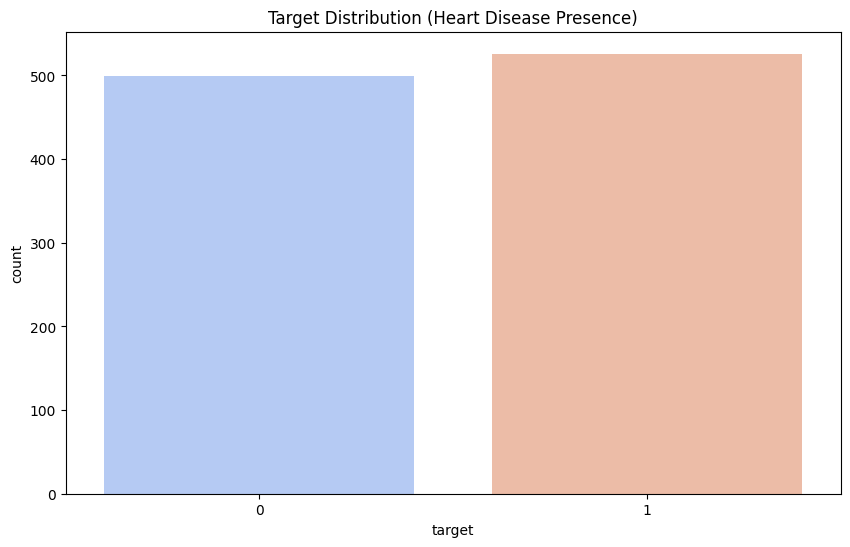

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Target Distribution (Heart Disease Presence)')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8080\2712082339.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("age_distribution.png")
C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


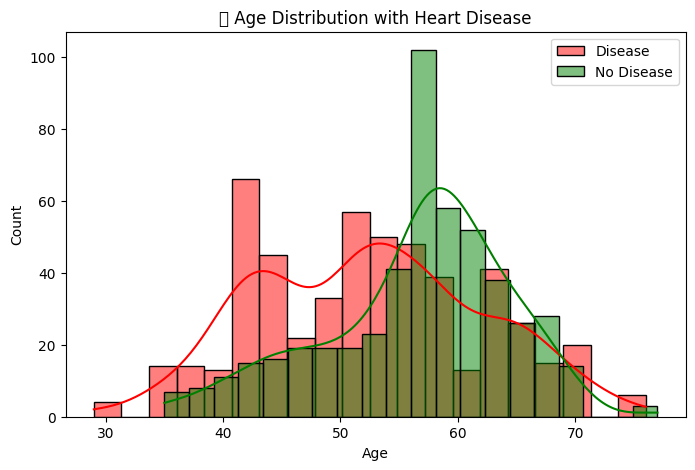

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["target"] == 1]["age"], bins=20, color="red", kde=True, label="Disease")
sns.histplot(df[df["target"] == 0]["age"], bins=20, color="green", kde=True, label="No Disease")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title("📊 Age Distribution with Heart Disease")
plt.savefig("age_distribution.png")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8080\3980452230.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("age_vs_thalach.png")
C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


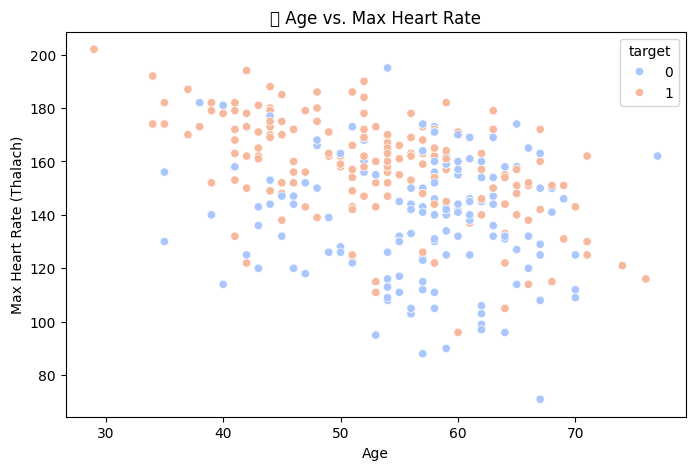

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["age"], y=df["thalach"], hue=df["target"], palette="coolwarm")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (Thalach)")
plt.title("📊 Age vs. Max Heart Rate")
plt.savefig("age_vs_thalach.png")
plt.show()

## Train Machine Learning Models

## 1.Logistic Regression

### ✅ What is it?
Logistic Regression is a simple classification algorithm that predicts probabilities.

It works well for binary classification (Yes/No, 1/0, Disease/No Disease).

### ⚡ How It Works?
1️⃣ Each feature (e.g., age, cholesterol, blood pressure) is given a weight.

2️⃣ The algorithm applies the sigmoid function to convert the result into a probability (0-1).

3️⃣ If the probability > 0.5, it predicts 1 (disease), else 0 (no disease).

### 🏆 Pros & Cons
✔ Fast, simple, and easy to interpret.

✔ Works well for small datasets.

❌ May not work well with complex, non-linear relationships.


In [14]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.7951219512195122
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


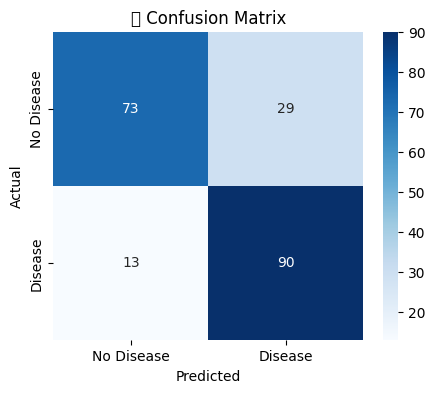

In [17]:
# results_df_log = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_log})
from sklearn.metrics import confusion_matrix
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix")
plt.show()


## 2.RandomForest Algorithm



### ✅ What is it?
Random Forest is an ensemble of multiple decision trees.

It makes a final decision based on majority voting.

### ⚡ How It Works?
1️⃣ The dataset is randomly split into multiple smaller parts.

2️⃣ A decision tree is trained on each part.

3️⃣ Each tree makes a prediction.

4️⃣ The final prediction is based on majority voting (if most trees predict "Disease," the model outputs "Disease").

### 🏆 Pros & Cons
✔ Handles non-linear relationships well.

✔ Less overfitting compared to a single decision tree.

❌ Slower than Logistic Regression.

❌ Harder to interpret compared to simple models.


In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


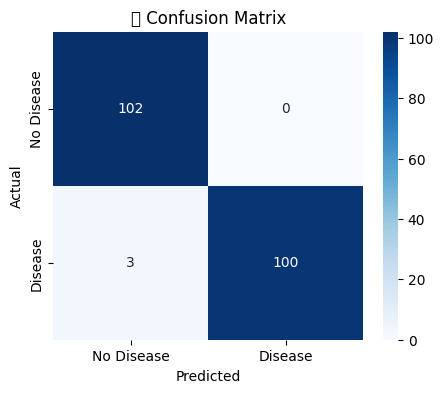

In [19]:
# results_df_log = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_log})
from sklearn.metrics import confusion_matrix
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix")
plt.show()


## 3.XGBClassifier

## XGBoost (Extreme Gradient Boosting)

### ✅ What is it?

XGBoost is an advanced boosting algorithm that builds multiple trees sequentially.

Each new tree corrects the mistakes of the previous tree.

### ⚡ How It Works?
1️⃣ The first decision tree makes an initial prediction.

2️⃣ The second tree learns from the errors of the first tree and improves.

3️⃣ The process continues, creating a strong final model.

### 🏆 Pros & Cons
✔ Highly accurate, often used in Kaggle competitions.

✔ Reduces false positives/negatives better than Random Forest.

✔ Works well with large datasets.

❌ More computationally expensive (needs more training time).

In [20]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


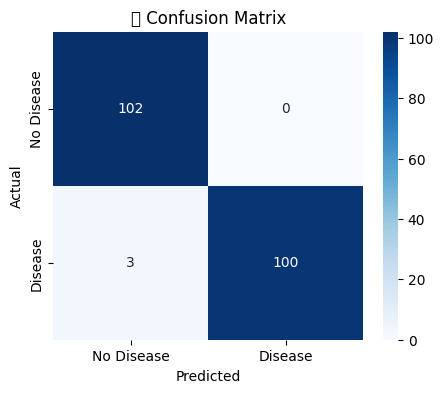

In [22]:
# results_df_log = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_log})
from sklearn.metrics import confusion_matrix
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix")
plt.show()


## Hybrid Model (Ensemble Learning)

### ✅ Why Use Multiple Models?
Instead of relying on one model, we can combine multiple models to improve accuracy.
This approach is called ensemble learning.

Think of it like a team:

- **Logistic Regression** → Good at making basic predictions.
- **Random Forest** → Good at handling non-linearity.
- **XGBoost** → Good at reducing errors.
- **Hybrid Model (Voting Classifier)** → Combines all of them to get the best performance.

---

## 3️⃣ How Does the Hybrid Model Work?

### ✅ Voting Classifier (Ensemble Model)
It takes predictions from Logistic Regression, Random Forest, and XGBoost.

Uses Voting to decide the final output.

### ⚡ How It Works?
1️⃣ Train all three models separately on the same data.
2️⃣ When making a prediction:
   - **Logistic Regression** → Predicts 1 (Disease)
   - **Random Forest** → Predicts 0 (No Disease)
   - **XGBoost** → Predicts 1 (Disease)
3️⃣ The Hybrid Model takes a majority vote:
   - **1 (Disease)** is the final prediction because 2 out of 3 models predicted it.

---

## 4️⃣ Types of Voting in Ensemble Models

### ✅ Hard Voting (Majority Rule)
The model chooses the most frequent prediction from individual models.

Example: If 2 models predict "Disease" and 1 model predicts "No Disease", the final output is "Disease".

### ✅ Soft Voting (Weighted Average of Probabilities)
Instead of taking a majority vote, we take the average probability from all models.

Example:

- Logistic Regression: **40%** probability of disease
- Random Forest: **60%** probability of disease
- XGBoost: **80%** probability of disease

**Average:** (40 + 60 + 80) / 3 = **60%** → Final Prediction = **Disease**

Soft Voting usually gives better results!

In [23]:
ensemble_model = VotingClassifier(estimators=[('lr', log_model), ('rf', rf_model), ('xgb', xgb_model)], voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
print('Hybrid Model Accuracy:', accuracy_score(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))


Hybrid Model Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:29:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


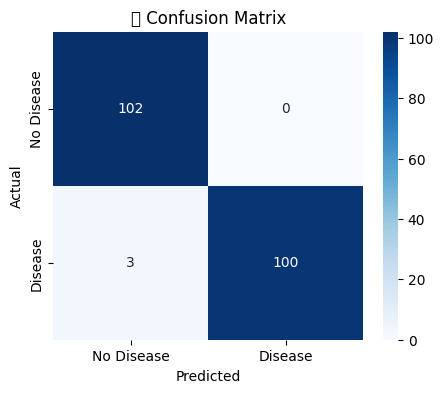

In [24]:
# results_df_log = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_log})
from sklearn.metrics import confusion_matrix
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ensemble)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix")
plt.show()


## Model Evaluation (Confusion Matrix & Classification Report)

In [9]:
print('Classification Report (Ensemble Model):')
print(classification_report(y_test, y_pred_ensemble))

Classification Report (Ensemble Model):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## Visualizing Actual vs Predicted Output

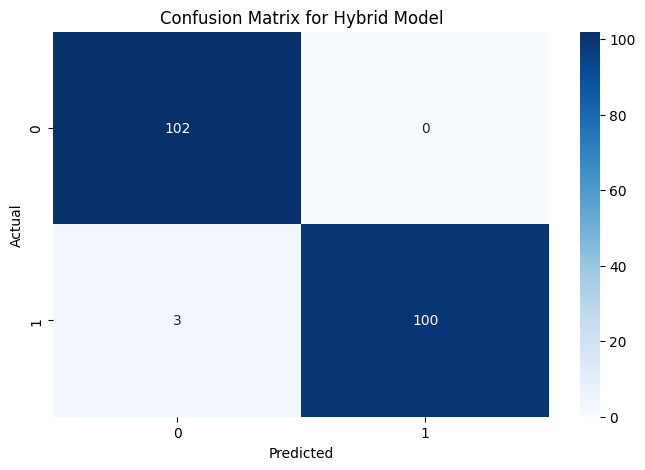

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Hybrid Model')
plt.show()

## Save Model & Scaler

In [25]:
joblib.dump(ensemble_model, 'heart_disease_hybrid_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print('Model and Scaler Saved!')

Model and Scaler Saved!
